# Covid data exploration



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2, f_regression
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from scipy import stats

In [2]:
dataset = pd.read_csv('dataframe_final.csv', index_col=0, low_memory = False)
dataset.shape

(422, 312)

In [3]:
dataset.head()

,confirmados_novos,recuperados,obitos,internados_uci,ativos,internados_enfermaria,Max_Temp,Min_Temp,Temperature,Precipitation,...,positive_rate_United Kingdom,tests_per_case_United Kingdom,new_cases_per_million_United States,new_deaths_per_million_United States,new_tests_per_thousand_United States,positive_rate_United States,tests_per_case_United States,new_cases_per_million_Vatican,new_cases_per_million_Venezuela,new_deaths_per_million_Venezuela
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-26,0.0,0.0,0.0,0.0,0.0,0.0,16.4,10.0,12.9,0.10,...,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2020-02-27,0.0,0.0,0.0,0.0,0.0,0.0,20.4,10.4,14.5,0.00,...,0.0,0.0,0.003,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2020-02-28,0.0,0.0,0.0,0.0,0.0,0.0,19.1,10.3,13.3,0.00,...,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0,0.0,0.0,0.0,18.0,13.1,15.1,3.53,...,0.0,0.0,0.024,0.003,0.000,0.0,0.0,0.0,0.0,0.0
2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,16.1,14.0,15.3,0.68,...,0.0,0.0,0.021,0.000,0.001,0.0,0.0,0.0,0.0,0.0


In [4]:
#descriptive statistics summary
dataset['obitos'].describe()

count    422.000000
mean      40.180095
std       61.526510
min        0.000000
25%        4.250000
50%       13.000000
75%       58.000000
max      303.000000
Name: obitos, dtype: float64

C:\Users\HMGN1\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


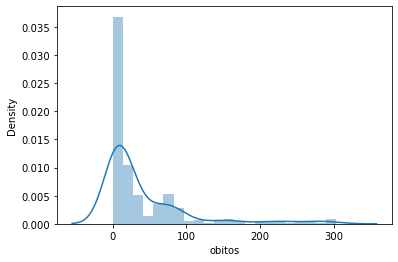

In [5]:
#histogram
sns.distplot(dataset['obitos']);

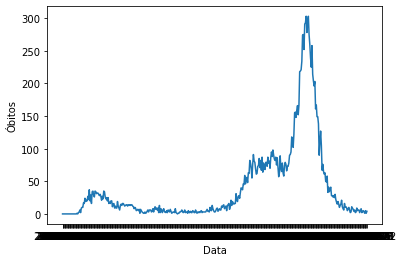

In [6]:
plt.plot(dataset.index, dataset['obitos'])
plt.xlabel("Data")
plt.ylabel("Óbitos")
plt.show()

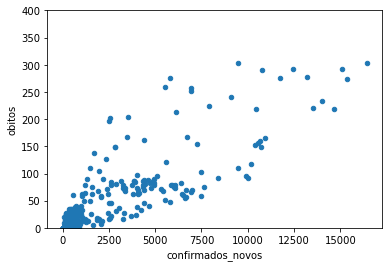

In [7]:
#scatter plot obitos/confirmados_novos
var = 'confirmados_novos'
data = pd.concat([dataset['obitos'], dataset[var]], axis=1)
data.plot.scatter(x=var, y='obitos', ylim=(0,400));

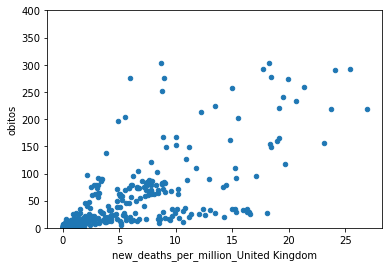

In [8]:
#scatter plot obitos/confirmados_novos
var = 'new_deaths_per_million_United Kingdom'
data = pd.concat([dataset['obitos'], dataset[var]], axis=1)
data.plot.scatter(x=var, y='obitos', ylim=(0,400));

In [9]:
#skewness and kurtosis
print("Skewness: %f" % dataset['obitos'].skew())
print("Kurtosis: %f" % dataset['obitos'].kurt())

Skewness: 2.446801
Kurtosis: 6.001893


In [10]:
pd.set_option('display.max_rows', None)
dataset.dtypes

confirmados_novos                                float64
recuperados                                      float64
obitos                                           float64
internados_uci                                   float64
ativos                                           float64
internados_enfermaria                            float64
Max_Temp                                         float64
Min_Temp                                         float64
Temperature                                      float64
Precipitation                                    float64
Wind_Speed                                       float64
Wind_Direction                                   float64
Visibility                                       float64
Cloud_Cover                                      float64
Relative_Humidity                                float64
Rain                                             float64
Clear                                            float64
Partially_cloudy               

# Teste à normalidade

Como p_value resultante do teste de shapiro é igual a 0 permite rejeitar a H0 ou seja, dados não seguem a distribuição normal.

In [12]:
w, p_value = stats.shapiro(dataset)
p_value

0.0

In [ ]:
#histogram and normal probability plot
sns.distplot(dataset['obitos'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(dataset['obitos'], plot=plt)

## Spearman correlation

Como os nossos dados não seguem uma distribuição normal ou seja, são não paramétricos, aplica-se a correlação de Spearman.

In [14]:
#Using Pearson Correlation
#plt.figure(figsize=(40,40))
cor = dataset.corr(method="spearman")
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()
#Correlation with output variable
cor_target = abs(cor['obitos'])
#Selecting highly correlated features
relevant_features = cor_target[abs(cor_target)>0.5]
len(relevant_features)

140

In [15]:
relevant_features

confirmados_novos                              0.808581
recuperados                                    0.692728
obitos                                         1.000000
Max_Temp                                       0.684288
Min_Temp                                       0.554803
Temperature                                    0.634965
Visibility                                     0.541161
total_testes                                   0.564693
testes_pcr                                     0.592028
testes_antigenio                               0.598217
tests_per_case_Australia                       0.628392
new_cases_per_million_Austria                  0.532173
new_deaths_per_million_Austria                 0.762776
icu_patients_per_million_Austria               0.664181
hosp_patients_per_million_Austria              0.717780
new_cases_per_million_Belgium                  0.523221
new_deaths_per_million_Belgium                 0.722486
icu_patients_per_million_Belgium               0

Como entendemos que temos muitas features, após observar os resultados das correlações de spearman, fizemos um filtro preliminar de features, eliminando features cuja correlação fosse menor que +/-0.50.

In [16]:
col = [column for column in dataset.columns if (column not in relevant_features.index)]
dataset = dataset.drop(columns=col, axis=1)

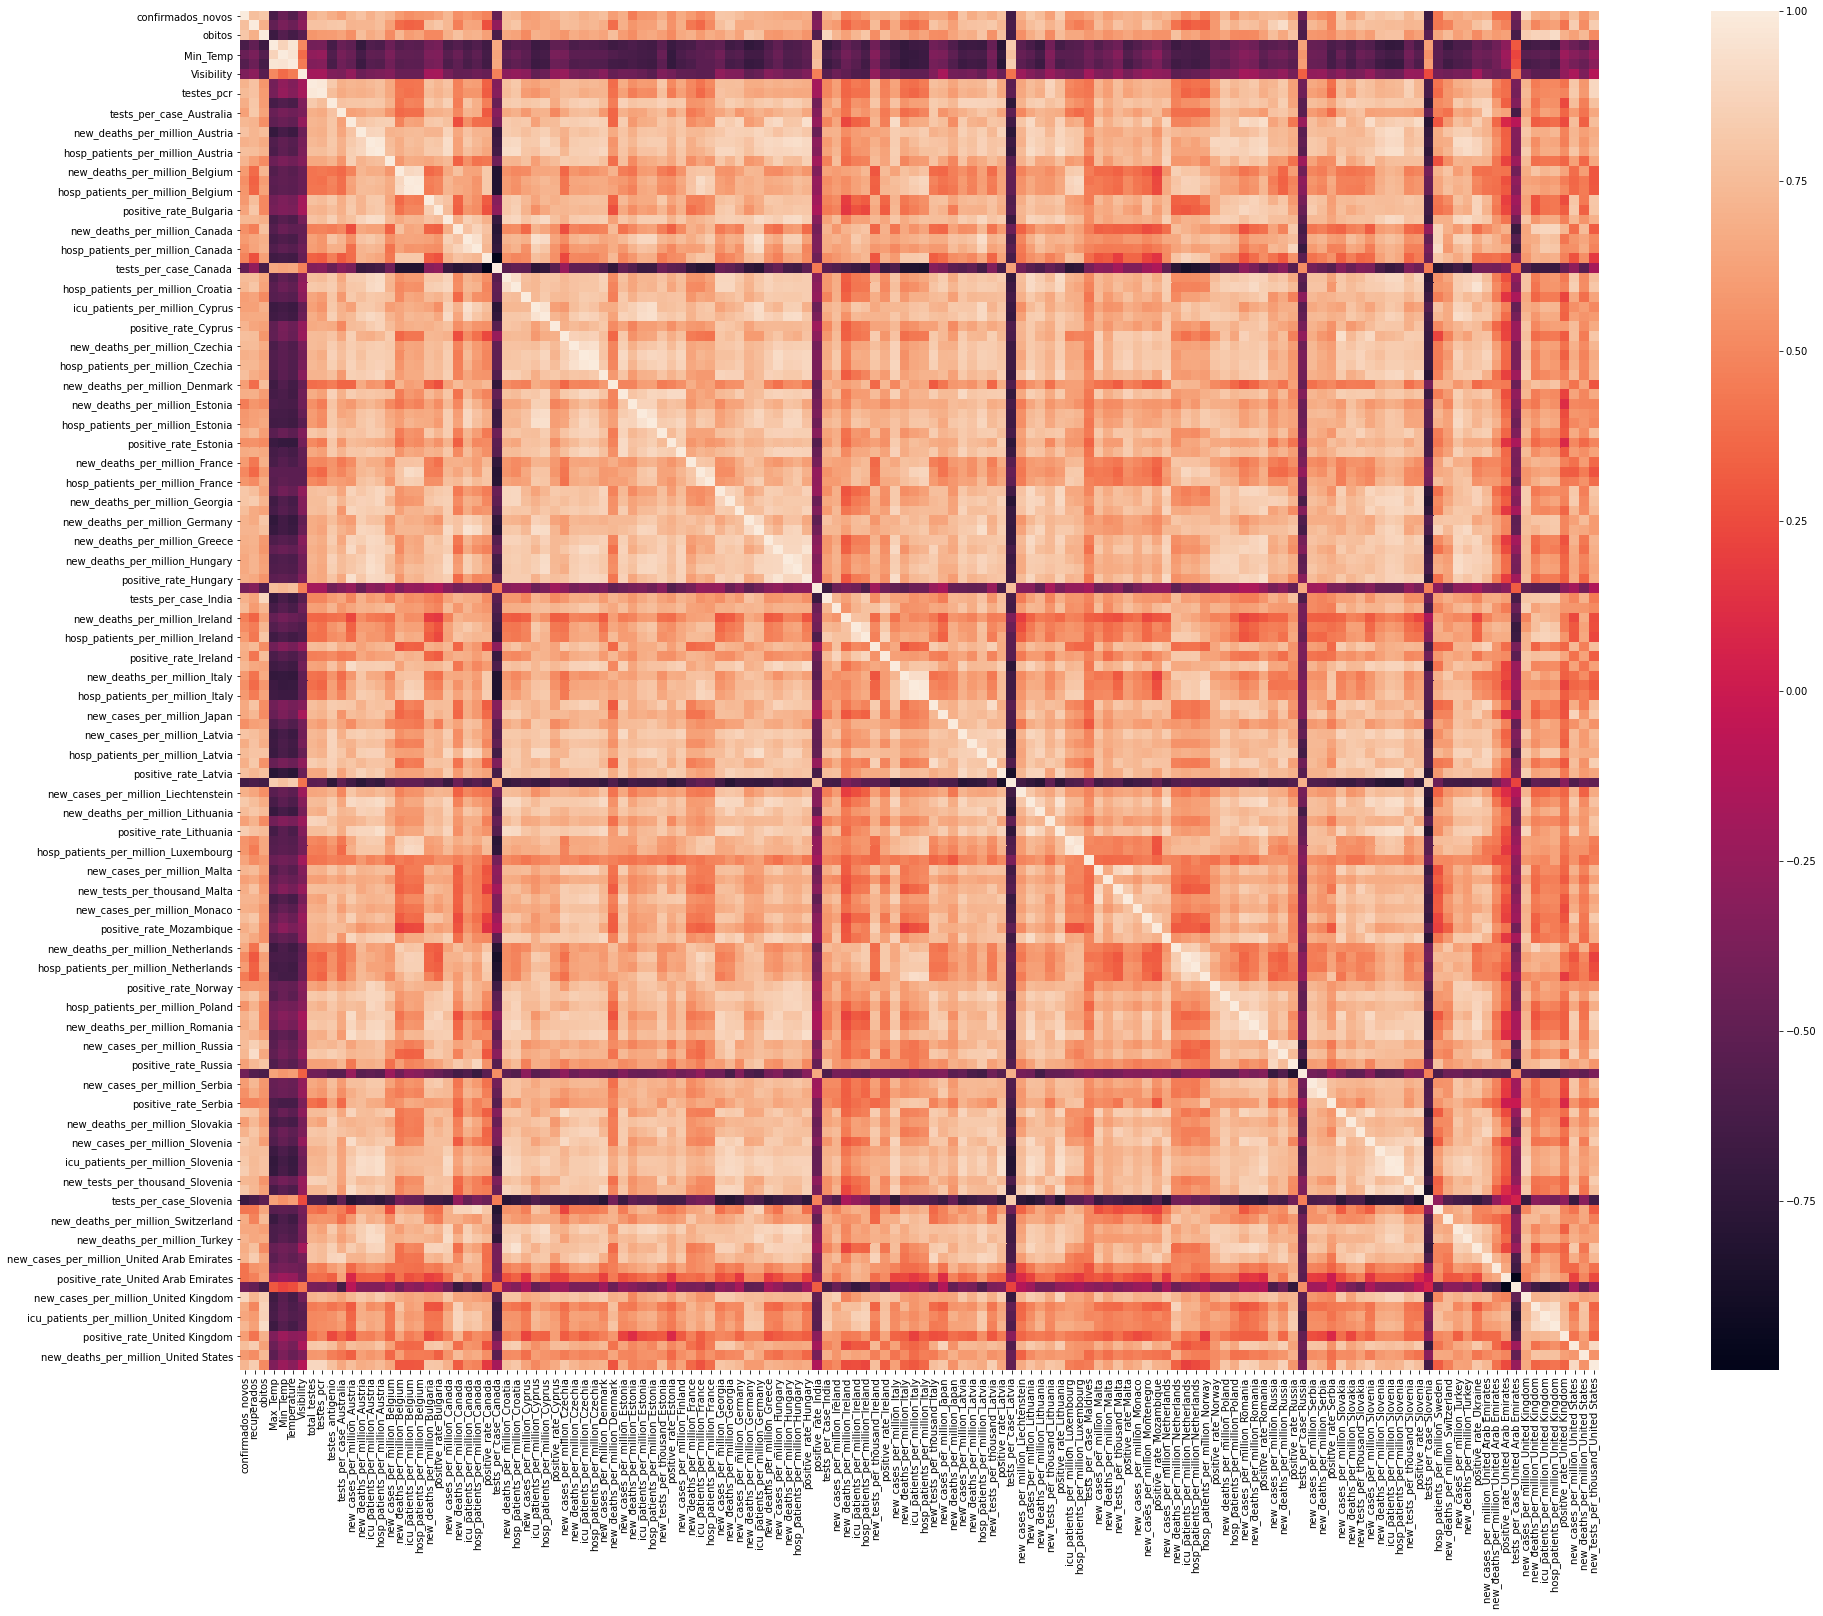

In [18]:
#correlation matrix
corrmat = dataset.corr(method="spearman")
f, ax = plt.subplots(figsize=(40, 25))
sns.heatmap(corrmat, square=True);

## Feature selection com SelectKBest

In [19]:
df_data = dataset.drop(columns='obitos')
df_label = dataset['obitos']

In [20]:
# Feature extraction
columns = []
test = SelectKBest(f_regression, k=50)
fit = test.fit_transform(abs(df_data), df_label)
for i in range(0, len(test.get_support())):
    if test.get_support()[i]:
        columns.append(dataset.columns[i])

In [21]:
len(columns)

50

In [22]:
fit[:19]

array([[0.0000e+00, 0.0000e+00, 1.6400e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5000e-01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e-03, 4.4000e-02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 0.0000e+00, 2.0400e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0600e-01,
        8.0000e-03, 0.0000e+00, 0.0000e+00, 0.0

In [25]:
df_data[:19]

Index(['confirmados_novos', 'recuperados', 'Max_Temp', 'Min_Temp',
       'Temperature', 'Visibility', 'total_testes', 'testes_pcr',
       'testes_antigenio', 'tests_per_case_Australia',
       ...
       'positive_rate_United Arab Emirates',
       'tests_per_case_United Arab Emirates',
       'new_cases_per_million_United Kingdom',
       'new_deaths_per_million_United Kingdom',
       'icu_patients_per_million_United Kingdom',
       'hosp_patients_per_million_United Kingdom',
       'positive_rate_United Kingdom', 'new_cases_per_million_United States',
       'new_deaths_per_million_United States',
       'new_tests_per_thousand_United States'],
      dtype='object', length=139)

Resultados:



## Feature selection of Lag Variables com Random Forest Regressor

We can also use feature selection to automatically identify and select those input features that are most predictive.

A popular method for feature selection is called Recursive Feature Selection (RFE).

RFE works by creating predictive models, weighting features, and pruning those with the smallest weights, then repeating the process until a desired number of features are left.

The code below uses RFE with a random forest predictive model and sets the desired number of input features to 10.

(A bar graph is also created showing the feature selection rank (smaller is better) for each input feature.)

In [26]:
# separate into input and output variables
array = dataset.values
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=50)
fit = rfe.fit(df_data, df_label)
# report selected features
print('Selected Features:')
names = dataset.columns.values[0:-1]
columns_1 = []
for i in range(len(fit.support_)):
    if fit.support_[i]:
        columns_1.append(names[i])
        print(names[i])
# plot feature rank
#names = dataset.columns.values[0:-1]
#ticks = [i for i in range(len(names))]
#pyplot.bar(ticks, fit.ranking_)
#pyplot.xticks(ticks, names)
#pyplot.show()

Selected Features:
confirmados_novos
recuperados
obitos
Temperature
testes_pcr
testes_antigenio
new_cases_per_million_Austria
new_deaths_per_million_Austria
new_cases_per_million_Belgium
new_deaths_per_million_Belgium
icu_patients_per_million_Belgium
hosp_patients_per_million_Belgium
new_deaths_per_million_Bulgaria
new_cases_per_million_Canada
new_deaths_per_million_Czechia
hosp_patients_per_million_Czechia
new_tests_per_thousand_Estonia
icu_patients_per_million_France
new_deaths_per_million_Germany
icu_patients_per_million_Germany
new_deaths_per_million_Hungary
hosp_patients_per_million_Hungary
positive_rate_India
new_deaths_per_million_Ireland
icu_patients_per_million_Ireland
new_tests_per_thousand_Ireland
positive_rate_Ireland
new_cases_per_million_Japan
new_cases_per_million_Latvia
hosp_patients_per_million_Latvia
new_tests_per_thousand_Latvia
new_tests_per_thousand_Lithuania
icu_patients_per_million_Luxembourg
new_deaths_per_million_Malta
new_tests_per_thousand_Malta
new_cases_per

In [27]:
len(columns_1)

50

## Escolha final de features:
Após fazer estes dois métodos de selecção de features, e visto que o seus resultados fazem bastante overlap, decidimos escolher as features resultantes iguais, bem como manter as diferentes. 

In [28]:
df_data.columns

Index(['confirmados_novos', 'recuperados', 'Max_Temp', 'Min_Temp',
       'Temperature', 'Visibility', 'total_testes', 'testes_pcr',
       'testes_antigenio', 'tests_per_case_Australia',
       ...
       'positive_rate_United Arab Emirates',
       'tests_per_case_United Arab Emirates',
       'new_cases_per_million_United Kingdom',
       'new_deaths_per_million_United Kingdom',
       'icu_patients_per_million_United Kingdom',
       'hosp_patients_per_million_United Kingdom',
       'positive_rate_United Kingdom', 'new_cases_per_million_United States',
       'new_deaths_per_million_United States',
       'new_tests_per_thousand_United States'],
      dtype='object', length=139)

In [29]:
final_columns = columns.copy()

for i in columns_1:
    if i not in columns:
        final_columns.append(i)

In [30]:
columns_to_drop = []
for i in df_data.columns:
    if i not in final_columns:
        columns_to_drop.append(i)
df_data = df_data.drop(columns=columns_to_drop, axis=1)
df_data.shape

(422, 76)

In [31]:
df_data.columns

Index(['confirmados_novos', 'recuperados', 'Temperature', 'Visibility',
       'total_testes', 'testes_pcr', 'testes_antigenio',
       'new_cases_per_million_Austria', 'new_deaths_per_million_Austria',
       'new_cases_per_million_Belgium', 'new_deaths_per_million_Belgium',
       'icu_patients_per_million_Belgium', 'hosp_patients_per_million_Belgium',
       'new_deaths_per_million_Bulgaria', 'new_cases_per_million_Canada',
       'new_deaths_per_million_Canada', 'icu_patients_per_million_Canada',
       'new_cases_per_million_Cyprus', 'new_deaths_per_million_Czechia',
       'hosp_patients_per_million_Czechia', 'new_cases_per_million_Denmark',
       'new_tests_per_thousand_Estonia', 'icu_patients_per_million_France',
       'new_cases_per_million_Georgia', 'new_cases_per_million_Germany',
       'new_deaths_per_million_Germany', 'icu_patients_per_million_Germany',
       'new_deaths_per_million_Hungary', 'hosp_patients_per_million_Hungary',
       'positive_rate_India', 'new_cases

In [32]:
df_data.to_csv("dataframe_explored.csv")